In [285]:
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.sparse import csr_matrix
from numpy.random import default_rng

In [286]:
#load preprocessed, harmonized data
def load_adata():
    print("loading data..\n\n")
    rna = ad.read_h5ad("rna-pp-harm-sub.h5ad")
    adt = ad.read_h5ad("adt-pp-harm-sub.h5ad")
    cytof = ad.read_h5ad("cytof-pp-harm-sub.h5ad")
    facs = ad.read_h5ad("facs-pp-harm-sub.h5ad")
        
    return rna, adt, cytof, facs

In [287]:
def to_dense(adata_list): #converting to dense representation makes it easier to reshape and visualize data
    print("converting adata to dense representation..\n\n")
    for adata in adata_list:
        if scipy.sparse.issparse(adata.X):
            adata.X = csr_matrix.todense(adata.X).copy()
            
    return adata_list

In [288]:
def sample_features(adata_list, single_features=True):
    
    rna, adt, cytof, facs = adata_list
    
    if single_features:
    #subset size is taken to equal the length of the smallest dataset: i.e. facs
        rng = default_rng()
        rna_subset = rng.choice(len(rna.var_names), size=5, replace=False) 
        adt_subset = rng.choice(len(adt.var_names), size=5, replace=False) 
        cytof_subset = rng.choice(len(cytof.var_names), size=5, replace=False)
        facs_subset = rng.choice(len(facs.var_names), size=5, replace=False)
        
    else:
        rng = default_rng()
        rna_subset = rng.choice(len(rna.var_names), size=48, replace=False) 
        adt_subset = rng.choice(len(adt.var_names), size=48, replace=False) 
        cytof_subset = rng.choice(len(cytof.var_names), size=48, replace=False)
        facs_subset = rng.choice(len(facs.var_names), size=12, replace=False)
        
    
    return rna_subset, adt_subset, cytof_subset, facs_subset

In [289]:
def visualize_distribution(adata_list, single_features = True):
    feature_list = sample_features(adata_list)
    
    if single_features:
        fig, axs = plt.subplots(4, 5, figsize=(15, 15))

        for i, adata in enumerate(adata_list):
            for j in range(5):
                axs[i, j].hist(adata.X[:,feature_list[i][j]])
                axs[i, j].set_title(adata.obs['Domain_major'][0])
                
                
    else:
        fig, axs = plt.subplots(4, 1, figsize=(15, 15))

        for i, adata in enumerate(adata_list):
            axs[i].hist(adata.X[:,feature_list[i]])
            axs[i].set_title(adata.obs['Domain_major'][0])

In [290]:
def main(single_features = True):
    adata_list = load_adata()
    adata_list = to_dense(adata_list)
    
    print("adata total number of features: rna: {}, adt: {}, cytof: {}, facs: {}".format(adata_list[0].shape[1],
                                                                                        adata_list[1].shape[1],
                                                                                        adata_list[2].shape[1],
                                                                                        adata_list[3].shape[1]))
    
    
    #visualizing single variable histograms
    visualize_distribution(adata_list, single_features = True)
    visualize_distribution(adata_list, single_features = True)

    #visualizing 48 variable histograms
    visualize_distribution(adata_list, single_features = False)
    visualize_distribution(adata_list, single_features = False)

loading data..


converting adata to dense representation..


adata total number of features: rna: 4000, adt: 192, cytof: 48, facs: 12


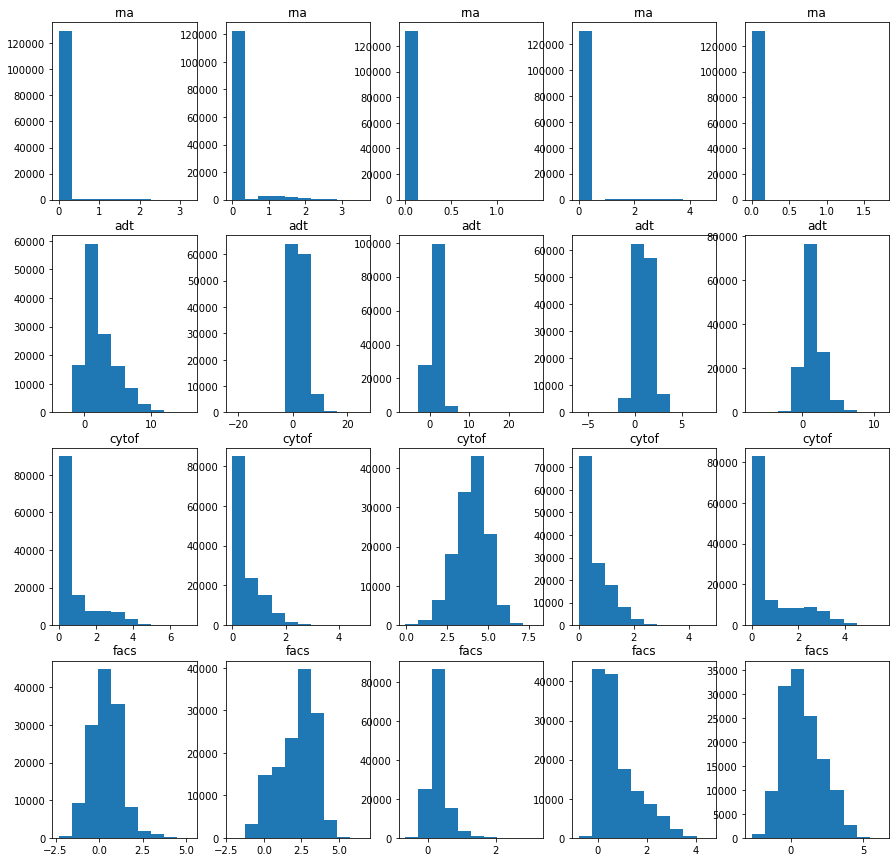

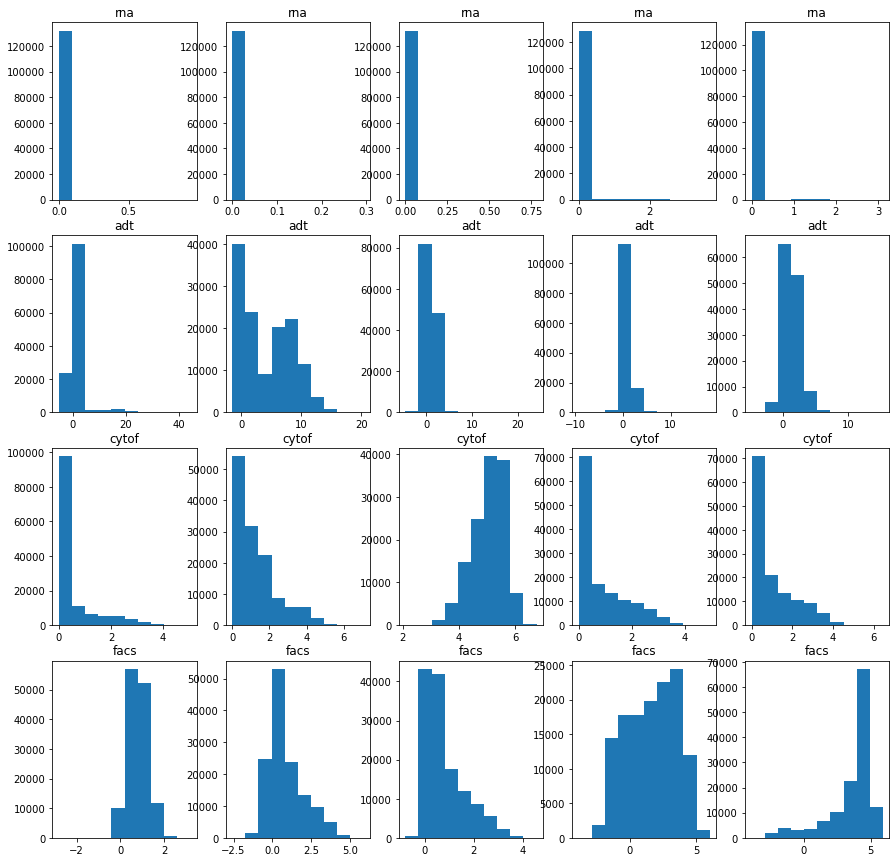

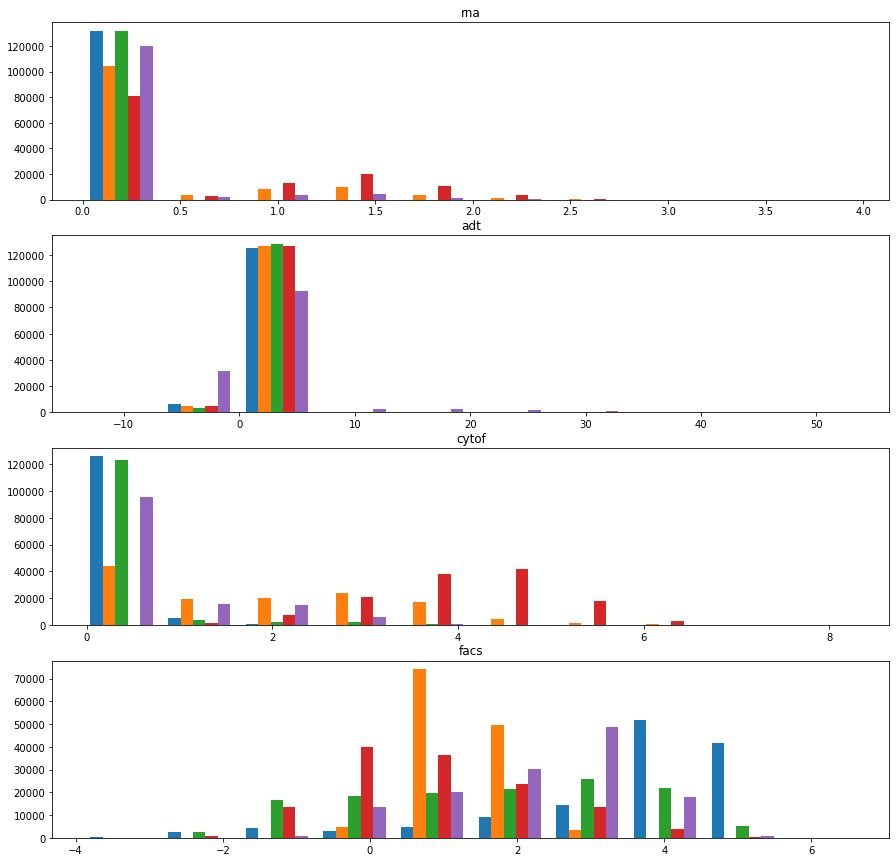

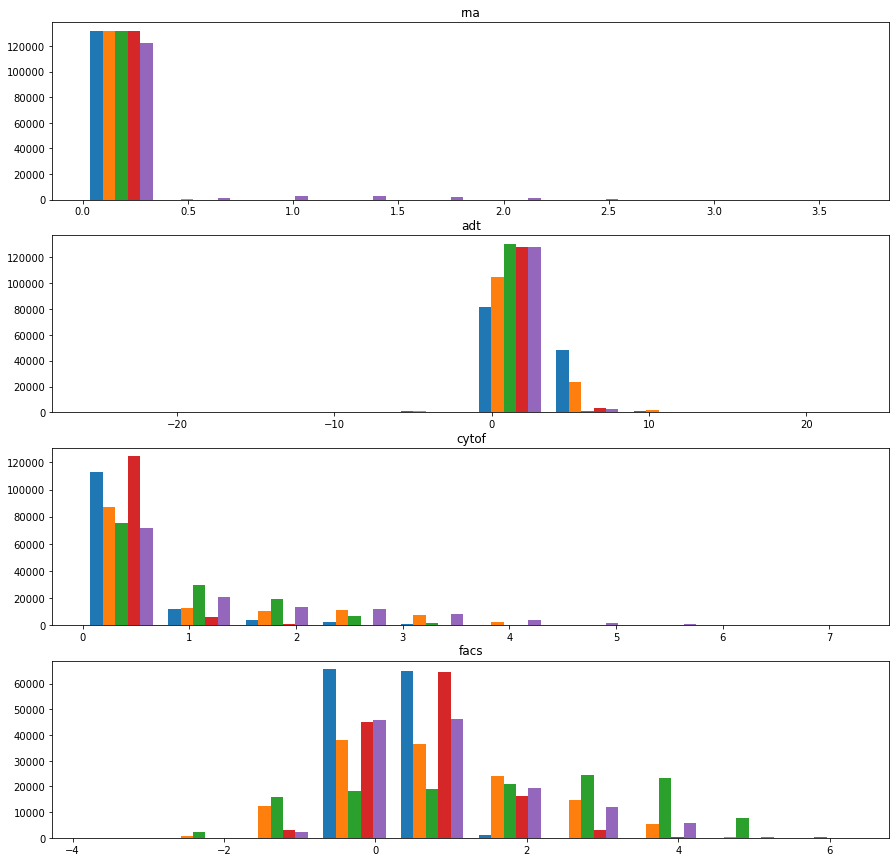

In [291]:
main()